In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100
reviews = []
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(url)   
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")
        
        


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | An airline that lives in the...
1,✅ Trip Verified | Check-in Desk rude and dism...
2,✅ Trip Verified | I chose British Airways espe...
3,Not Verified | I booked Premium Economy from I...
4,✅ Trip Verified | A simple story with an unfor...


In [4]:
df['reviews'] = df.reviews.str.split('|',expand=True)[1]

In [5]:
df['reviews'].head()

0     An airline that lives in their past glory and...
1      Check-in Desk rude and dismissive. Flight la...
2     I chose British Airways especially because I ...
3     I booked Premium Economy from INV to LAX (via...
4     A simple story with an unfortunate outcome th...
Name: reviews, dtype: object

In [6]:
import re

In [7]:
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text


In [8]:
df['reviews'] = df['reviews'].apply(clean)

In [9]:
df.head()

,reviews
0,An airline that lives in their past glory and...
1,Check in Desk rude and dismissive Flight late...
2,I chose British Airways especially because I ...
3,I booked Premium Economy from INV to LAX via ...
4,A simple story with an unfortunate outcome th...


In [10]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [14]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10060] A connection attempt failed because
[nltk_data]     the connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


False

In [13]:
import nltk

In [18]:
from nltk.corpus import stopwords

In [19]:
def remove_stopwords_from_pos_tags(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)
    
    # Get the set of English stopwords
    stop_words = set(stopwords.words('english'))
    
    # Filter out stopwords based on their POS tags
    filtered_pos_tags = [(word, pos) for word, pos in pos_tags if word.lower() not in stop_words]
    
    # Return the filtered words as a string (optional)
    filtered_text = ' '.join(word for word, pos in filtered_pos_tags)
    return filtered_text

In [20]:
df['cleaned'] = df["reviews"].apply(remove_stopwords_from_pos_tags)

In [21]:
df['cleaned']

0      airline lives past glory heading future crisis...
1      Check Desk rude dismissive Flight late seems n...
2      chose British Airways especially going travel ...
3      booked Premium Economy INV LAX via LHR notifie...
4      simple story unfortunate outcome really could ...
                             ...                        
995    flew Los Angeles Leeds Bradford via Heathrow T...
996    Brindisi London Flying airport includes Ryanai...
997    Chicago London flown long haul many times BA V...
998    Berlin London connecting flight complain fligh...
999    British Airways favorite airline Boeing years ...
Name: cleaned, Length: 1000, dtype: object

In [22]:
def pos_tags(text):
    text = pos_tag(word_tokenize(text))
    return text

In [23]:
df["pos_tags"] = df['reviews'].apply(pos_tags)

In [24]:
df.head()

,reviews,cleaned,pos_tags
0,An airline that lives in their past glory and...,airline lives past glory heading future crisis...,"[(An, DT), (airline, NN), (that, WDT), (lives,..."
1,Check in Desk rude and dismissive Flight late...,Check Desk rude dismissive Flight late seems n...,"[(Check, NNP), (in, IN), (Desk, NNP), (rude, N..."
2,I chose British Airways especially because I ...,chose British Airways especially going travel ...,"[(I, PRP), (chose, VBD), (British, JJ), (Airwa..."
3,I booked Premium Economy from INV to LAX via ...,booked Premium Economy INV LAX via LHR notifie...,"[(I, PRP), (booked, VBD), (Premium, NNP), (Eco..."
4,A simple story with an unfortunate outcome th...,simple story unfortunate outcome really could ...,"[(A, DT), (simple, JJ), (story, NN), (with, IN..."


In [25]:
!pip install vaderSentiment

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



In [27]:
analyzer.polarity_scores(df['cleaned'][1])


{'neg': 0.18, 'neu': 0.752, 'pos': 0.069, 'compound': -0.5267}

In [28]:
analyzer.polarity_scores(df['cleaned'][0])


{'neg': 0.292, 'neu': 0.557, 'pos': 0.15, 'compound': -0.7269}

In [29]:
analyzer.polarity_scores(df['cleaned'][3])

{'neg': 0.13, 'neu': 0.808, 'pos': 0.063, 'compound': -0.7269}

In [30]:
df['comp_score'] = df.apply(lambda x:analyzer.polarity_scores(x['cleaned'])['compound'],axis = 1)

In [31]:
df.head()

,reviews,cleaned,pos_tags,comp_score
0,An airline that lives in their past glory and...,airline lives past glory heading future crisis...,"[(An, DT), (airline, NN), (that, WDT), (lives,...",-0.7269
1,Check in Desk rude and dismissive Flight late...,Check Desk rude dismissive Flight late seems n...,"[(Check, NNP), (in, IN), (Desk, NNP), (rude, N...",-0.5267
2,I chose British Airways especially because I ...,chose British Airways especially going travel ...,"[(I, PRP), (chose, VBD), (British, JJ), (Airwa...",-0.8126
3,I booked Premium Economy from INV to LAX via ...,booked Premium Economy INV LAX via LHR notifie...,"[(I, PRP), (booked, VBD), (Premium, NNP), (Eco...",-0.7269
4,A simple story with an unfortunate outcome th...,simple story unfortunate outcome really could ...,"[(A, DT), (simple, JJ), (story, NN), (with, IN...",0.8107


In [34]:
df['sentiment'] = df.apply(lambda x: sentiment(x["comp_score"]),axis = 1)

In [33]:
def sentiment(score):
    if score > 0.5:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return  "neutral"
       

In [35]:
df.head()

,reviews,cleaned,pos_tags,comp_score,sentiment
0,An airline that lives in their past glory and...,airline lives past glory heading future crisis...,"[(An, DT), (airline, NN), (that, WDT), (lives,...",-0.7269,negative
1,Check in Desk rude and dismissive Flight late...,Check Desk rude dismissive Flight late seems n...,"[(Check, NNP), (in, IN), (Desk, NNP), (rude, N...",-0.5267,negative
2,I chose British Airways especially because I ...,chose British Airways especially going travel ...,"[(I, PRP), (chose, VBD), (British, JJ), (Airwa...",-0.8126,negative
3,I booked Premium Economy from INV to LAX via ...,booked Premium Economy INV LAX via LHR notifie...,"[(I, PRP), (booked, VBD), (Premium, NNP), (Eco...",-0.7269,negative
4,A simple story with an unfortunate outcome th...,simple story unfortunate outcome really could ...,"[(A, DT), (simple, JJ), (story, NN), (with, IN...",0.8107,positive


In [36]:
df['sentiment'].value_counts()

positive    488
negative    399
neutral     113
Name: sentiment, dtype: int64

In [117]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='sentiment'>

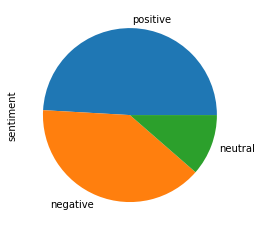

In [120]:
df["sentiment"].value_counts().plot(kind = 'pie')

([<matplotlib.patches.Wedge at 0x25a84f7ae80>,
 [Text(0.031097634977506766, 1.0995603380891865, 'positive'),
  Text(-0.4145580984795792, -1.018892331399641, 'negative'),
  Text(1.2643423691745355, -0.47322127330681485, 'neutral')],
 [Text(0.016962346351367324, 0.5997601844122834, '49.1%'),
  Text(-0.2261225991706795, -0.5557594534907132, '39.5%'),
  Text(0.7960674176284112, -0.29795413504503154, '11.4%')])

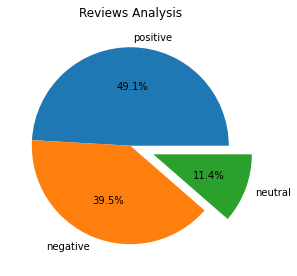

In [122]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(df["sentiment"].value_counts().values, labels = df["sentiment"].value_counts().index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)